## **[How Much Forecasting Performance Do You Lose During Model Selection?](https://towardsdatascience.com/how-much-forecasting-performance-do-you-lose-during-model-selection-923889e2f2dc)**
### *How often does cross-validation pick the best forecasting model? What happens when it doesn’t?*

Suppose you have a forecasting problem. You need to select a model to solve it. You may want to test a few alternatives with cross-validation.

Have you ever wondered what’s the chance that cross-validation selects the best possible model? And, if not, how poorer is the model that is picked?

Let’s find out.

#### **Introduction**
Cross-validation, for time series or otherwise, solves two problems:

- **Performance estimation.** How well is the model going to perform in new data? You can use these estimations to assess whether the model can be deployed;
- **Model Selection.** Use the above estimates to rank a pool of available models. For example, different configurations of a learning algorithm for hyper-parameter tuning. In this case, you select the model with the best performance estimates.
Wait! Aren’t these two problems the same?

Not really. A given method (say, TimeSeriesSplits) may provide good performance estimates, on average. But it can be poor for ranking the available models, thereby poor for model selection.

#### **Example**
Let me give an example. Suppose you want to compare four models: M1, M2, M3, and M4. These are shown in the x-axis of Figure 1 below.

The true test loss of these models is displayed in blue bars. Their ranking is M1 > M2 > M3 > M4. So, M1 is the best model because it shows the lowest error (say, the mean absolute error).

Then, two cross-validation methods (CV1 and CV2) are used to estimate the error of each model.

<center> <p>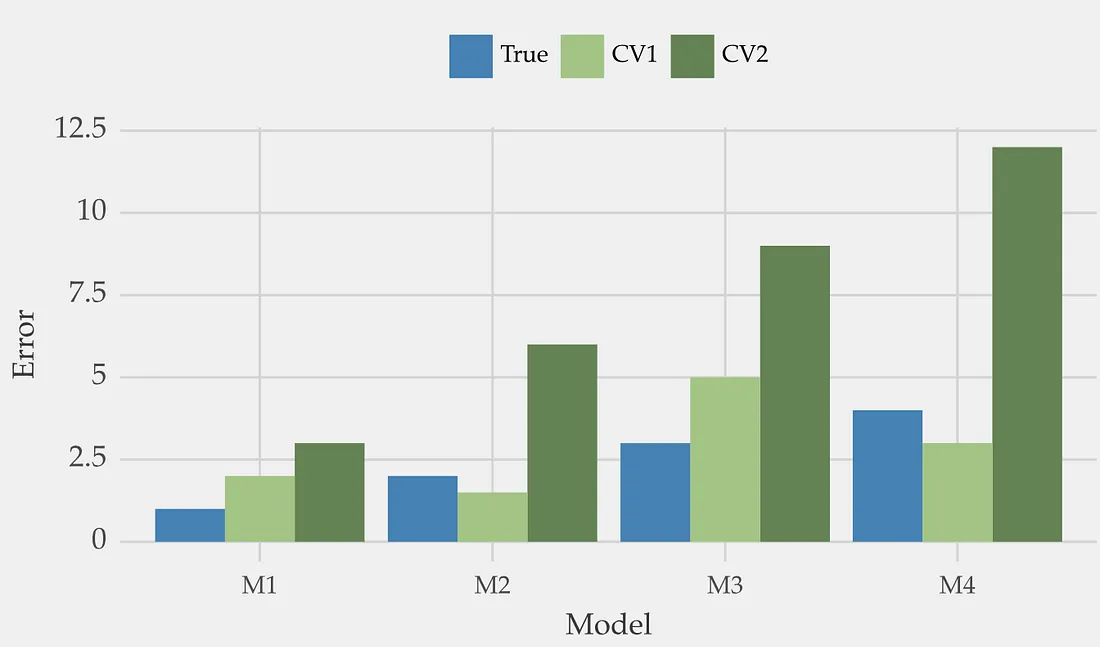</p> </center>

CV1 produces the best estimations (nearest to the true error), on average. But, the estimated ranking (M2 > M1 > M4 > M3) is different than the actual one. It is also worse than the ranking produced by CV2.

Despite providing worse performance estimates, CV2 outputs a perfect ranking of the models.

This example shows that one CV technique can be better for performance estimation (CV1), but another for model selection (CV2).



### **Performance Loss During Model Selection**
Suppose you’re doing model selection for forecasting. Two questions may come to your mind:

1. What’s the chance that cross-validation selects the best model? The one that will have the best performance in the test set.
2. What happens when it doesn’t? How poorer is the performance of the selected model?

#### **Testing Different Cross-Validation Approaches**
We can answer these questions by simulating a realistic scenario. First, apply cross-validation to select a model using the training data. Then, check how this model does in a test set.

Let’s do this step-by-step.

I prepared 50 different forecasting models. These include different configurations of linear models, and decision trees, among others. The models are trained with a supervised learning approach called auto-regression. Without going into details, the recent past values are used as explanatory variables. The target variables are future observations.

Then, I applied several cross-validation techniques to select the best model. These include TimeSeriesSplits (a.k.a. Time Series Cross-Validation), MonteCarloCV, or K-fold Cross-validation.

I repeated this process for almost 3000 different time series.

Here are the results.

#### **Cross-validation Selection Accuracy**
The selection accuracy is the percentage of times a cross-validation approach picks the best model.

<center> <p>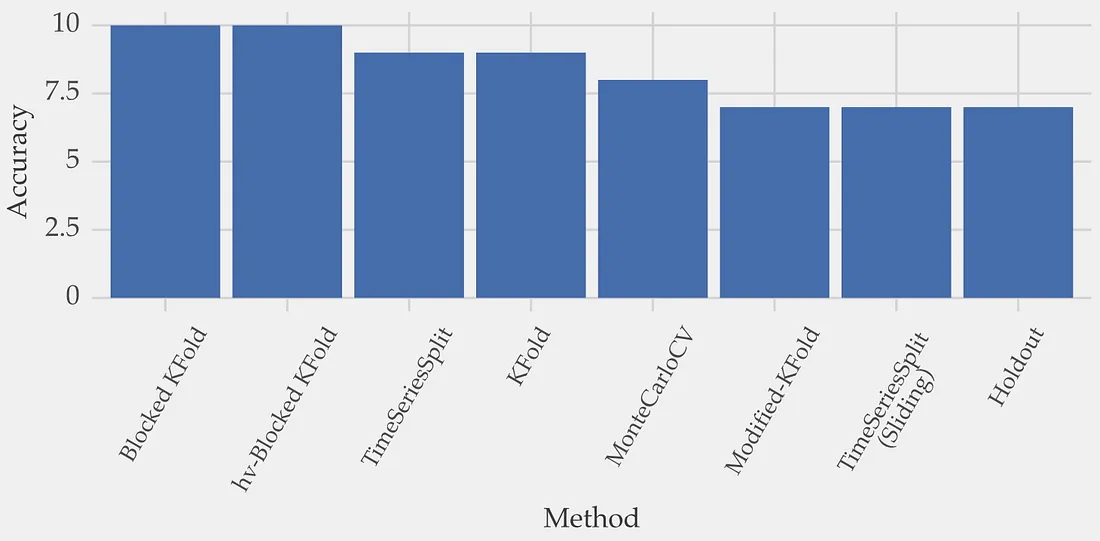</p> </center>

The scores range from 7% to 10%.

Sounds low, right? Still, if you were to select a model at random you’d expect a 2% accuracy (1 over 50 possible models). So, 7% to 10% is way better than that.

Yet, all methods will probably fail to select the best model. Then, comes the second question.

#### **How good is the selected model?**
To answer this question, we compare the selected model with the model that should have been selected.

We can measure the percentage difference in error between these two. The difference is 0 when the best model is selected by cross-validation.

<center> <p>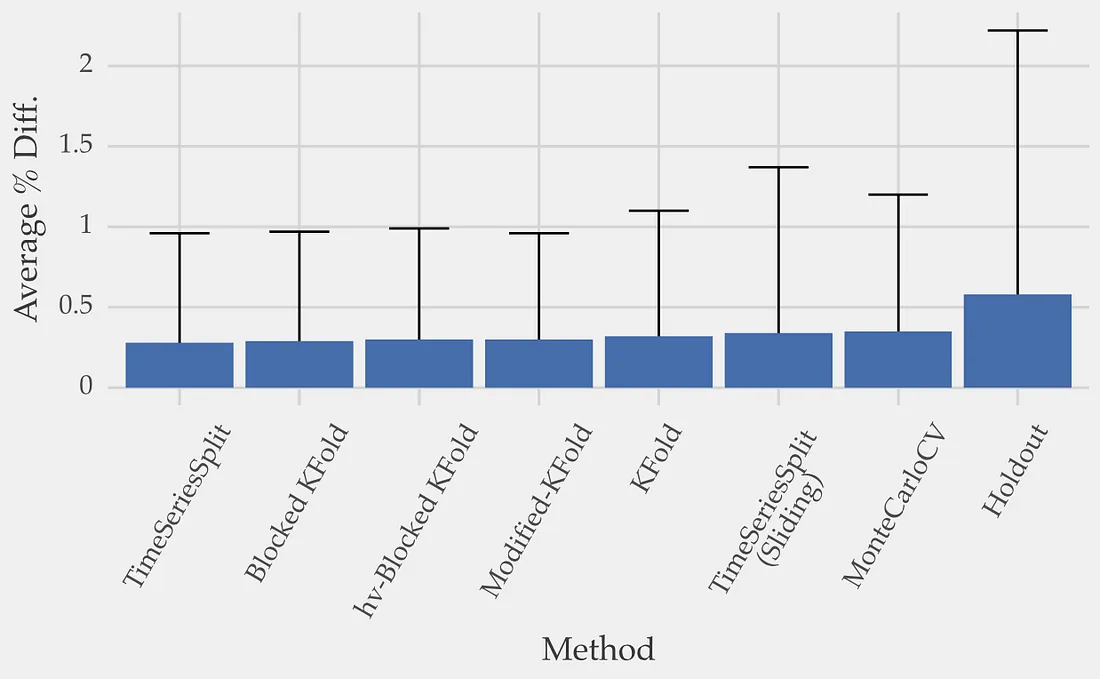</p> </center>

Most estimators select a model that performs about 0.3% worse than the best possible model, on average. There are some differences here and there. But, by and large, different cross-validation methods show similar performance for model selection.

The exception is Holdout, which represents a single split. This corroborates the recommendation I put forth in a previous article. Unless the time series is large, carry out many splits if you can.

You can check the full experiments in the article in reference [1]. These can be reproduced using the code available in [my Github](https://towardsdatascience.com/how-much-forecasting-performance-do-you-lose-during-model-selection-923889e2f2dc).

#### **Take Aways**
- Model selection is the process of using cross-validation for selecting a model from a pool of alternatives;
- With 50 alternative models, cross-validation has a 7%-10% chance of picking the best one;
- When the best model is not picked, the selected model will perform about 0.3–0.35% worse, on average;
- Several cross-validation splits are important for better model selection.

Thanks for reading and see you in the next story!

#### **Further Readings**
[1] Cerqueira, Vitor, Luis Torgo, and Carlos Soares. “Model Selection for Time Series Forecasting: Empirical Analysis of Different Estimators.” arXiv preprint arXiv:2104.00584 (2021).

[2] Arlot, Sylvain, and Alain Celisse. “A survey of cross-validation procedures for model selection.” Statistics surveys 4 (2010): 40–79.